In [1]:
# Importing magic to reload modules automatically
%load_ext autoreload
%autoreload 2
%matplotlib inline
# Importing standard packages
from Exam_notebook import *

# Windmill industry in Denmark

In [ ]:
# DON'T RUN THIS CELL IF THE EXCEL FILE IS ALREADY DOWNLOADED. It will stop the Kernel.

# Downloading the dataset
url = "https://ens.dk/sites/ens.dk/files/Statistik/anlaeg.xlsx" 
r = requests.get(url)
with open('windmills.xlsx', 'wb') as xls_file:
 xls_file.write(r.content)

PermissionError: [Errno 13] Permission denied: 'windmills.xlsx'

## Question 1

**Subquestion 1**

In [2]:
# Loading first sheet in xlsx file and skipping 17 rows to get the right variables.
windmill_file_sh1 = pd.read_excel('windmills.xlsx', sheet_name='IkkeAfmeldte-Existing turbines', skiprows=17)

# Sample
windmill_file_sh1.head(1)

,Møllenummer (GSRN),Dato for oprindelig nettilslutning,Kapacitet (kW),Rotor-diameter (m),Navhøjde (m),Fabrikat,Model,Kommune-nr.,Kommune,Type af placering,...,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,2022
0,571313174000804817,2014-12-18,10.0,7.1,21.4,Ukendt,Ukendt,306.0,Odsherred,Land,...,660.996,20961.965,18082.508,22277.543,19034.258,19765.712,21738.808,19344.249,2767.528,2767.528


In [3]:
# Renaming known variables

# Due to row shift for the variables in the sheet, we rename the unnamed variables.
windmill_file_sh1.rename(columns = {'Dato for oprindelig nettilslutning':'Dato_for_oprindelig_nettilslutning', 'Kapacitet (kW)' : 'Kapacitet_kW', 'Navhøjde (m)' : 'Navhøjde_m', 'Type af placering' : 'Type_af_placering', 'Unnamed: 16':'1977', 'Unnamed: 17':'1978', 'Unnamed: 18':'1979', 'Unnamed: 19':'1980', 'Unnamed: 20':'1981', 'Unnamed: 21':'1982', 'Unnamed: 22':'1983', 'Unnamed: 23':'1984', 'Unnamed: 24':'1985', 'Unnamed: 25':'1986', 'Unnamed: 26':'1987', 'Unnamed: 27':'1988', 'Unnamed: 28':'1989', 'Unnamed: 29':'1990', 'Unnamed: 30':'1991', 'Unnamed: 31':'1992', 'Unnamed: 32':'1993', 'Unnamed: 33':'1994', 'Unnamed: 34':'1995', 'Unnamed: 35':'1996', 'Unnamed: 36':'1997', 'Unnamed: 37':'1998', 'Unnamed: 38':'1999', 'Unnamed: 39':'2000', 'Unnamed: 40':'2001', 'Unnamed: 41':'2002', 'Unnamed: 42':'2003', 'Unnamed: 43':'2004', 'Unnamed: 44':'2005', 'Unnamed: 45':'2006', 'Unnamed: 46':'2007', 'Unnamed: 47':'2008', 'Unnamed: 48':'2009', 'Unnamed: 49':'2010', 'Unnamed: 50':'2011', 'Unnamed: 51':'2012', 'Unnamed: 52':'2013', 'Unnamed: 53':'2014', 'Unnamed: 54':'2015', 'Unnamed: 55':'2016', 'Unnamed: 56':'2017', 'Unnamed: 57':'2018', 'Unnamed: 58':'2019', 'Unnamed: 59':'2020', 'Unnamed: 60':'2021', 'Unnamed: 61':'2022'}, inplace=True)
# When displaying the dataframe will show all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Sample
windmill_file_sh1.head(1)

,Møllenummer (GSRN),Dato_for_oprindelig_nettilslutning,Kapacitet_kW,Rotor-diameter (m),Navhøjde_m,Fabrikat,Model,Kommune-nr.,Kommune,Type_af_placering,Ejerlav,Matrikel-nummer,X (øst) koordinat \nUTM 32 Euref89,Y (nord) koordinat \nUTM 32 Euref89,Koordinatoprindelse,Netselskabets installations-nummer,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2022
0,571313174000804817,2014-12-18,10.0,7.1,21.4,Ukendt,Ukendt,306.0,Odsherred,Land,NaN,NaN,648438.63,6204436.7,SDFE2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,660.996,20961.965,18082.508,22277.543,19034.258,19765.712,21738.808,19344.249,2767.528,2767.528


In [4]:
 # Delete last column due to duplicate and columns that won't be used throughout the exam
windmill_file_sh1.drop(columns=windmill_file_sh1.columns[-1], axis=1, inplace=True) #Run this code only once, since it will delete the last row continuously.
windmill_file_sh1.drop((['Rotor-diameter (m)', 'Fabrikat', 'Model', 'Kommune-nr.', 'Ejerlav', 'Matrikel-nummer', 'X (øst) koordinat \nUTM 32 Euref89', 'Y (nord) koordinat \nUTM 32 Euref89', 'Koordinatoprindelse', 'Netselskabets installations-nummer']), axis=1, inplace=True)

# Inserting extra identifying column to whether the windmill is commisioned or not
windmill_file_sh1['Afmeldt'] = False
windmill_file_sh1.head(5)

,Møllenummer (GSRN),Dato_for_oprindelig_nettilslutning,Kapacitet_kW,Navhøjde_m,Kommune,Type_af_placering,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Afmeldt
0,571313174000804817,2014-12-18,10.0,21.4,Odsherred,Land,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,660.996,20961.965,18082.508,22277.543,19034.258,19765.712,21738.808,19344.249,2767.528,False
1,571313174001563744,2015-11-11,10.0,21.4,Odsherred,Land,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33893.471,31523.179,26551.478,28612.657,30342.784,26575.282,3890.161,False
2,571313174001571824,2015-12-11,10.0,21.4,Odsherred,Land,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19836.985,24099.193,18633.339,21664.386,25493.766,18492.510,2986.391,False
3,571313174001596582,2016-03-16,10.0,21.4,Odsherred,Land,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8394.415,16891.256,13213.681,13420.181,12275.096,10868.029,2097.290,False
4,571313174001768668,2018-09-26,10.0,20.3,Odsherred,Land,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2401.236,13232.761,17921.794,13164.235,2438.269,False


Now we do the same for the second sheet "Afmeldte-Decommissioned", but changes will be made since the two datasets aren't identical

In [5]:
# Loading second sheet in xlsx file and skipping 17 rows to get the right variables.
windmill_file_sh2 = pd.read_excel('windmills.xlsx', sheet_name='Afmeldte-Decommissioned', skiprows=17)
# Due to row shift fro the variables in the sheet, we rename the unnamed variables.
windmill_file_sh2.rename(columns = {'Dato for oprindelig nettilslutning':'Dato_for_oprindelig_nettilslutning', 'Kapacitet (kW)' : 'Kapacitet_kW', 'Navhøjde (m)' : 'Navhøjde_m', 'Type af placering' : 'Type_af_placering', 'Unnamed: 17':'1977', 'Unnamed: 18':'1978', 'Unnamed: 19':'1979', 'Unnamed: 20':'1980', 'Unnamed: 21':'1981', 'Unnamed: 22':'1982', 'Unnamed: 23':'1983', 'Unnamed: 24':'1984', 'Unnamed: 25':'1985', 'Unnamed: 26':'1986', 'Unnamed: 27':'1987', 'Unnamed: 28':'1988', 'Unnamed: 29':'1989', 'Unnamed: 30':'1990', 'Unnamed: 31':'1991', 'Unnamed: 32':'1992', 'Unnamed: 33':'1993', 'Unnamed: 34':'1994', 'Unnamed: 35':'1995', 'Unnamed: 36':'1996', 'Unnamed: 37':'1997', 'Unnamed: 38':'1998', 'Unnamed: 39':'1999', 'Unnamed: 40':'2000', 'Unnamed: 41':'2001', 'Unnamed: 42':'2002', 'Unnamed: 43':'2003', 'Unnamed: 44':'2004', 'Unnamed: 45':'2005', 'Unnamed: 46':'2006', 'Unnamed: 47':'2007', 'Unnamed: 48':'2008', 'Unnamed: 49':'2009', 'Unnamed: 50':'2010', 'Unnamed: 51':'2011', 'Unnamed: 52':'2012', 'Unnamed: 53':'2013', 'Unnamed: 54':'2014', 'Unnamed: 55':'2015', 'Unnamed: 56':'2016', 'Unnamed: 57':'2017', 'Unnamed: 58':'2018', 'Unnamed: 59':'2019', 'Unnamed: 60':'2020', 'Unnamed: 61':'2021', 'Unnamed: 62':'2022'}, inplace=True)

# Delete last column due to duplicate
windmill_file_sh2.drop(columns=windmill_file_sh2.columns[-1], axis=1, inplace=True)
# Delete 'Dato for afmelding' since this is a unique variabel for this dataframe
windmill_file_sh2.drop('Dato for afmeldning', axis=1, inplace=True)
# Renaming 'typebetegnelse' as this is the same variable as 'model' in sheet 1
windmill_file_sh2.rename(columns = {'Typebetegnelse':'Model'}, inplace=True)
# Inserting extra identifying column to whether the windmill commisioned or not
windmill_file_sh2['Afmeldt'] = True
windmill_file_sh2.head(1)

,Møllenummer (GSRN),Dato_for_oprindelig_nettilslutning,Kapacitet_kW,Rotor-diameter (m),Navhøjde_m,Fabrikat,Model,Kommune-nr.,Kommune,Type_af_placering,Ejerlav,Matrikel-nummer,X (øst) koordinat \nUTM 32 Euref89,Y (nord) koordinat \nUTM 32 Euref89,Koordinatoprindelse,Netselskabets installations-nummer,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Afmeldt
0,570714700000008788,1990-01-01,130.0,20.0,40.0,Vestas Wind Systems A/S,V 20,329.0,Ringsted,LAND,Sneslev,1r,683220.48,6139877.43,"GST, 18-02-2013",174141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215939.0,226237.0,230663.0,188822.0,254626.0,226227.0,184989.0,204757.0,234505.0,186345.0,209277.0,192755.666992,248368.708984,191148.155273,168092.101562,156679.381348,138593.068359,184394.924316,126445.275146,85937.445137,50425.154473,4513.41,124923.8,80147.701,114877.518,157272.185,63388.403,NaN,NaN,NaN,NaN,NaN,NaN,True


We now check whether the variables in the datasets are identical 

In [6]:
[col for col in list(windmill_file_sh1)[:] if col not in list(windmill_file_sh2)[:]]

[]

In [7]:
[col for col in list(windmill_file_sh2)[:] if col not in list(windmill_file_sh1)[:]]

['Rotor-diameter (m)',
 'Fabrikat',
 'Model',
 'Kommune-nr.',
 'Ejerlav',
 'Matrikel-nummer',
 'X (øst) koordinat \nUTM 32 Euref89',
 'Y (nord) koordinat \nUTM 32 Euref89',
 'Koordinatoprindelse',
 'Netselskabets installations-nummer']

We can now see that there are variables in windmill_file_sh2 that the other sheet don't have. We will deal with this further down. Now we combine the dataframes.

In [8]:
# Combine dataframes
dataset_combined = pd.concat([windmill_file_sh1, windmill_file_sh2])
dataset_combined.head(1)

,Møllenummer (GSRN),Dato_for_oprindelig_nettilslutning,Kapacitet_kW,Navhøjde_m,Kommune,Type_af_placering,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Afmeldt,Rotor-diameter (m),Fabrikat,Model,Kommune-nr.,Ejerlav,Matrikel-nummer,X (øst) koordinat \nUTM 32 Euref89,Y (nord) koordinat \nUTM 32 Euref89,Koordinatoprindelse,Netselskabets installations-nummer
0,571313174000804817,2014-12-18,10.0,21.4,Odsherred,Land,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,660.996,20961.965,18082.508,22277.543,19034.258,19765.712,21738.808,19344.249,2767.528,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As shown in the table above, we can see that "Type af placering" are changing between upper- and lowercase letters. We make alle string-value letters in this column lowercase.

In [9]:
dataset_combined['Type_af_placering'] = dataset_combined['Type_af_placering'].str.lower()
dataset_combined['Type_af_placering'].value_counts()

land    9098
hav      642
Name: Type_af_placering, dtype: int64

Given from the questions, there's a lot of variables that we don't use when analyzing. We remove those variables from the dataset to make the dataset more tidy.

In [10]:
dataset_combined.drop((['Rotor-diameter (m)', 'Fabrikat', 'Model', 'Kommune-nr.', 'Ejerlav', 'Matrikel-nummer', 'X (øst) koordinat \nUTM 32 Euref89', 'Y (nord) koordinat \nUTM 32 Euref89', 'Koordinatoprindelse', 'Netselskabets installations-nummer', '2022']), axis=1, inplace=True)
dataset_combined.head(1)

,Møllenummer (GSRN),Dato_for_oprindelig_nettilslutning,Kapacitet_kW,Navhøjde_m,Kommune,Type_af_placering,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Afmeldt
0,571313174000804817,2014-12-18,10.0,21.4,Odsherred,land,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,660.996,20961.965,18082.508,22277.543,19034.258,19765.712,21738.808,19344.249,False


Before using the dataset for analysis, we reshape it from wide to long format, which will make it easier

In [11]:
df1 = pd.melt(dataset_combined, id_vars=['Møllenummer (GSRN)', 'Kommune', 'Type_af_placering', 'Navhøjde_m', 'Dato_for_oprindelig_nettilslutning', 'Kapacitet_kW', 'Afmeldt'], var_name="Year", value_name="Produktion_kWh")
df1.reset_index(inplace=True)
df1.head(5)

,index,Møllenummer (GSRN),Kommune,Type_af_placering,Navhøjde_m,Dato_for_oprindelig_nettilslutning,Kapacitet_kW,Afmeldt,Year,Produktion_kWh
0,0,571313174000804817,Odsherred,land,21.4,2014-12-18,10.0,False,1977,NaN
1,1,571313174001563744,Odsherred,land,21.4,2015-11-11,10.0,False,1977,NaN
2,2,571313174001571824,Odsherred,land,21.4,2015-12-11,10.0,False,1977,NaN
3,3,571313174001596582,Odsherred,land,21.4,2016-03-16,10.0,False,1977,NaN
4,4,571313174001768668,Odsherred,land,20.3,2018-09-26,10.0,False,1977,NaN


In [12]:
# 438480 rows and 9 columns
df1.shape

(438480, 10)

We have to make sure that all variables are the correct type

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438480 entries, 0 to 438479
Data columns (total 10 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   index                               438480 non-null  int64         
 1   Møllenummer (GSRN)                  438480 non-null  object        
 2   Kommune                             436050 non-null  object        
 3   Type_af_placering                   438300 non-null  object        
 4   Navhøjde_m                          438300 non-null  float64       
 5   Dato_for_oprindelig_nettilslutning  438300 non-null  datetime64[ns]
 6   Kapacitet_kW                        438300 non-null  float64       
 7   Afmeldt                             438480 non-null  bool          
 8   Year                                438480 non-null  object        
 9   Produktion_kWh                      172420 non-null  float64       
dtypes: bool(

In [14]:
# Removing all rows with NAN
df1 = df1.dropna()

In [15]:
# 172128 rows and 9 columns
df1.shape

(172128, 10)

There are also values with zero, which we want to remove

In [16]:
df1 = df1[df1['Produktion_kWh'] !=0]
# 169977 rows and 9 columns
df1.shape

(169977, 10)

In [17]:
# Rounding down to 3 decimals
df1 = df1.round(3)

**Subquestion 2**

In [18]:
# Creating variable - Produktion_GWh
df1 = df1.assign(Produktion_GWh = lambda x: x.Produktion_kWh / 1000000)
df1.head(1)

,index,Møllenummer (GSRN),Kommune,Type_af_placering,Navhøjde_m,Dato_for_oprindelig_nettilslutning,Kapacitet_kW,Afmeldt,Year,Produktion_kWh,Produktion_GWh
16322,16322,570714700000006517,Guldborgsund,land,18.0,1978-01-01,45.0,True,1978,40000.0,0.04


In [19]:
# Groupby
q1_plot = df1.groupby(['Year'])['Produktion_GWh'].sum()

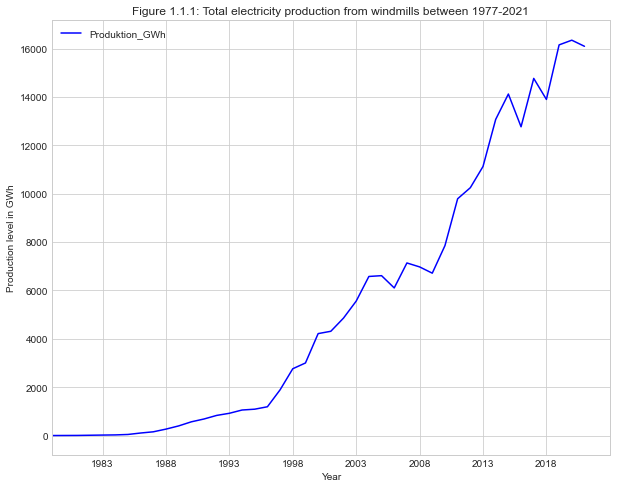

In [20]:
# Plot the content of the data frame
ax = q1_plot.plot(figsize = (10,8), grid=True, xlim=(1, 45),  x='Year',y='Produktion_GWh', xlabel='Year', ylabel='Production level in GWh', color='blue', title = "Figure 1.1.1: Total electricity production from windmills between 1977-2021")
ax.legend(loc='upper left')

plt.show()

We see that the total electricity production from windmills has increased almost exponentially since 1978. We don't have 1977 in the dataset, since there are no production data from this year. The electricity production took a small dive in the financial crisis and was a bit volatile from 2014-2021.  

## Question 2

**Subquestion 1**

In [21]:
# Extracting year from datetime for 'Dato for oprindelig nettilslutning' for easier analysis
df1['Dato_for_oprindelig_nettilslutning'] = pd.to_datetime(df1['Dato_for_oprindelig_nettilslutning'], format='%Y%m%d')
df1['Year_for_oprindelig_nettilslutning'] = pd.DatetimeIndex(df1['Dato_for_oprindelig_nettilslutning']).year   
# Creating variable - Kapacitet_kW_yearly by multiplying 'kapacitet (kW)' with number of hours per year
hours_per_year = 8760
df1 = df1.assign(Kapacitet_kW_yearly = lambda x: x.Kapacitet_kW * hours_per_year)
df1 = df1.assign(Kapacitet_GW_yearly = lambda x: x.Kapacitet_kW_yearly / 1000000)
df1 = df1.round(3)


In [22]:
# Calculating the average and max capacity for each year
df1.groupby('Year_for_oprindelig_nettilslutning')["Kapacitet_GW_yearly"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Year_for_oprindelig_nettilslutning,,,,,,,,
1977,48.0,0.23,0.04,0.19,0.19,0.19,0.26,0.26
1978,222.0,0.93,1.25,0.10,0.19,0.48,0.48,3.50
1979,224.0,0.27,0.15,0.10,0.17,0.19,0.48,0.48
1980,901.0,0.34,0.16,0.13,0.19,0.26,0.48,0.79
1981,2139.0,0.30,0.15,0.07,0.19,0.26,0.48,0.57
1982,2110.0,0.40,0.37,0.07,0.19,0.48,0.48,3.50
1983,1623.0,0.43,0.14,0.10,0.48,0.48,0.48,0.66
1984,1989.0,0.47,0.20,0.07,0.48,0.48,0.48,1.75
1985,6942.0,0.61,0.18,0.07,0.48,0.66,0.66,2.63


In [23]:
# Defining them as variables to plot
q21_mean_plot = df1.groupby(['Year_for_oprindelig_nettilslutning'])['Kapacitet_GW_yearly'].mean().round(2)
q21_max_plot = df1.groupby(['Year_for_oprindelig_nettilslutning'])['Kapacitet_GW_yearly'].max().round(2)

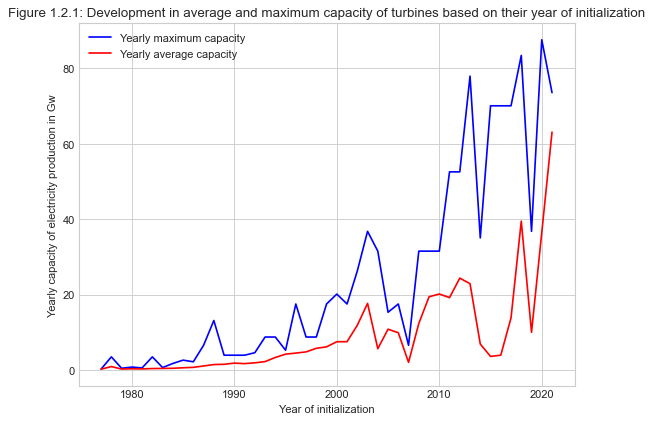

In [24]:
# Plotting the figure
fig = plt.figure(figsize=(8,6), dpi=80)

ax = fig.add_subplot(1,1,1)
ax.set_title('Figure 1.2.1: Development in average and maximum capacity of turbines based on their year of initialization')
ax.plot(q21_max_plot, color='blue', label='Yearly maximum capacity')
ax.plot(q21_mean_plot, color='red', label='Yearly average capacity')


ax.set_xlabel('Year of initialization')
ax.set_ylabel('Yearly capacity of electricity production in Gw')

ax.legend(loc='best',frameon=False);


plt.show()


We see that the yearly average are following the same trend as the yearly maximum capacity but slightly below in most periods. In 2014 the average capacity is taking a huge dive in both maximum and average capacity. The fall in average capacity might be due to an increase in the number of windmills, whereas the maximum might be due to a specific kind of windmill was trending.

**Subquestion 2**

In [25]:
# Constructing new dataframe from the statistics
df2 = df1.groupby('Year_for_oprindelig_nettilslutning')["Kapacitet_GW_yearly"].describe().round(2)
df2.head()

,count,mean,std,min,25%,50%,75%,max
Year_for_oprindelig_nettilslutning,,,,,,,,
1977,48.0,0.23,0.04,0.19,0.19,0.19,0.26,0.26
1978,222.0,0.93,1.25,0.10,0.19,0.48,0.48,3.50
1979,224.0,0.27,0.15,0.10,0.17,0.19,0.48,0.48
1980,901.0,0.34,0.16,0.13,0.19,0.26,0.48,0.79
1981,2139.0,0.30,0.15,0.07,0.19,0.26,0.48,0.57


In [26]:
# Inserting Moving average in dataframe 'df2' and resetting index
df2['Moving_average_mean'] = df2['mean'].rolling(window=7, center=True).mean()
df2['Moving_average_max'] = df2['max'].rolling(window=7, center=True).mean()
df2 = df2.reset_index()


In [27]:
# Changing the format for year_for_oprindelig_nettilslutning to datetime
df2['Year_for_oprindelig_nettilslutning'] = df2['Year_for_oprindelig_nettilslutning'].astype(int)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year_for_oprindelig_nettilslutning  45 non-null     int32  
 1   count                               45 non-null     float64
 2   mean                                45 non-null     float64
 3   std                                 45 non-null     float64
 4   min                                 45 non-null     float64
 5   25%                                 45 non-null     float64
 6   50%                                 45 non-null     float64
 7   75%                                 45 non-null     float64
 8   max                                 45 non-null     float64
 9   Moving_average_mean                 39 non-null     float64
 10  Moving_average_max                  39 non-null     float64
dtypes: float64(10), int32(1)
memory usage: 3.8 KB


In [28]:
# Defining them as variables to plot
q22_moving_mean_plot = df2.groupby(['Year_for_oprindelig_nettilslutning'])['Moving_average_mean']
q22_moving_max_plot = df2.groupby(['Year_for_oprindelig_nettilslutning'])['Moving_average_max']

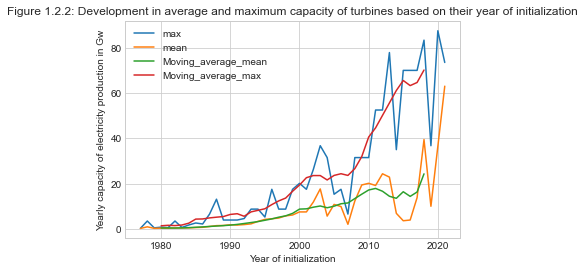

In [29]:
# Plotting the figure

df2.plot.line(x='Year_for_oprindelig_nettilslutning', y=['max', 'mean', 'Moving_average_mean', 'Moving_average_max'])
plt.xlabel("Year of initialization")
plt.ylabel("Yearly capacity of electricity production in Gw")
plt.title("Figure 1.2.2: Development in average and maximum capacity of turbines based on their year of initialization")
plt.show()

As shown in the above figure 2.2 we see that we have included the Seven year moving average, which mitigates the short term fluctuations in capacity. Hence, giving a better understanding of the general development.

**Subquestion 3**

Earlier in the code, we dropped all observations for nan- and zero values. Therefore, the dataframe, df1 is already sorted such that the capacity of a turbine only include the years when it is connected to the grid.

In [30]:
df1.head(1)


,index,Møllenummer (GSRN),Kommune,Type_af_placering,Navhøjde_m,Dato_for_oprindelig_nettilslutning,Kapacitet_kW,Afmeldt,Year,Produktion_kWh,Produktion_GWh,Year_for_oprindelig_nettilslutning,Kapacitet_kW_yearly,Kapacitet_GW_yearly
16322,16322,570714700000006517,Guldborgsund,land,18.0,1978-01-01,45.0,True,1978,40000.0,0.04,1978,394200.0,0.394


In [31]:
# Defining variable
q23_plot = df1.groupby(['Year'])['Kapacitet_GW_yearly'].sum()

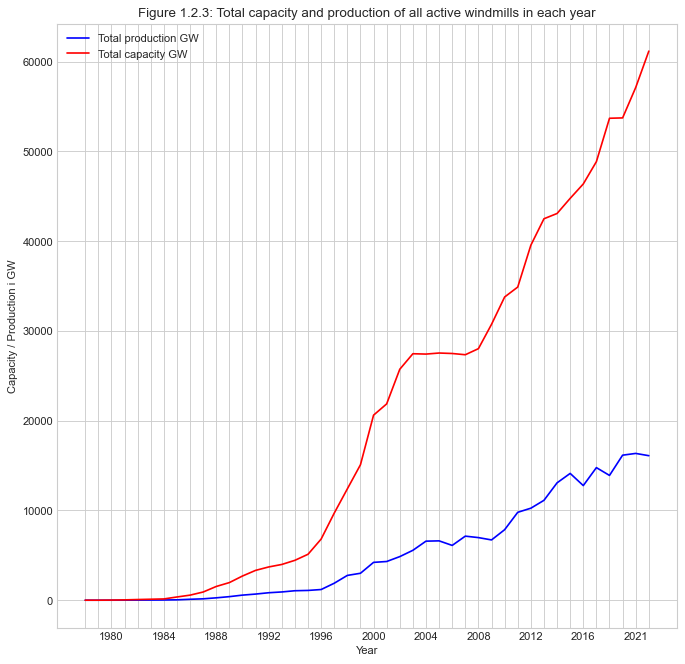

In [32]:
# Plotting the figure
fig = plt.figure(figsize=(10,10), dpi=80)

ax = fig.add_subplot(1,1,1)
ax.set_title('Figure 1.2.3: Total capacity and production of all active windmills in each year')
ax.plot(q1_plot, color='blue', label='Total production GW')
ax.plot(q23_plot, color='red', label='Total capacity GW')


ax.set_xlabel('Year')
ax.set_ylabel('Capacity / Production i GW')
ax.set_xticklabels(['' if i%4 != 0 else str(i) for i in np.arange(int(q1_plot.index[0]),int(q1_plot.index[-2]),1)]+["2021"])


ax.legend(loc='best',frameon=False);

plt.show()


We see from figure 2.3, that the total level of capacity is increasing exponentially, while the production have a more linear positive development. This results in a huge difference in the unnused potential output of production with regards to the capacity as time goes on. We see a stagnation in both the capacity and production during the financial crisis, this might be due to a stagnation of further investments into the windmill sector. 

## Question 3

In [33]:
df1.head(2)

,index,Møllenummer (GSRN),Kommune,Type_af_placering,Navhøjde_m,Dato_for_oprindelig_nettilslutning,Kapacitet_kW,Afmeldt,Year,Produktion_kWh,Produktion_GWh,Year_for_oprindelig_nettilslutning,Kapacitet_kW_yearly,Kapacitet_GW_yearly
16322,16322,570714700000006517,Guldborgsund,land,18.0,1978-01-01,45.0,True,1978,40000.0,0.040,1978,394200.0,0.394
16850,16850,570715000000032516,Varde,land,0.1,1977-12-15,22.0,True,1978,48400.0,0.048,1977,192720.0,0.193


**Subquestion 1**

In [34]:
# Constructing new dataframe with only values of production in 2021
df2021 = df1[df1['Year'] == '2021']
# Removing observations where heigth is less than 1 meter
df2021 = df2021[df2021['Navhøjde_m'] >1]

We found it unplausible that there existed windmills that are below 1 meter in height and therefore excluded them from the dataset.

[Text(0.5, 1.0, 'Figure 1.3.1 Correlation between hub height and electricity production in 2021')]

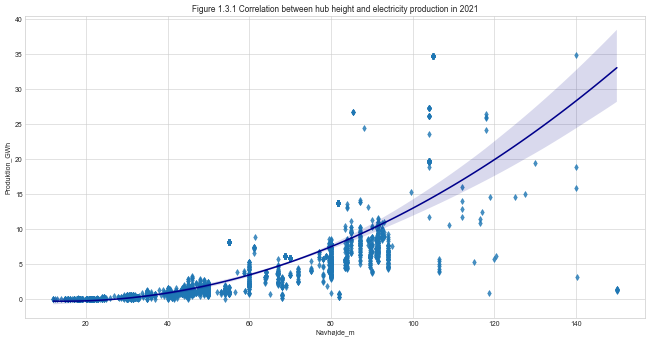

In [35]:
# Plotting figure
plt.figure(figsize=(16,8), dpi=50)

sns.regplot(x="Navhøjde_m", y="Produktion_GWh", data=df2021, order=2, marker='d', line_kws={'color': 'darkblue'}).set(title='Figure 1.3.1 Correlation between hub height and electricity production in 2021')

From figure 3.1 shown above, we see that there is an exponential trend in the height of the windmill and its production in 2021. See Figure 3.2 for further analysis.

**Subquestion 2**

As we only examinated the correlation between height and production in 2021 above this is the timeframe we will analyse in this question aswell.

It is of interest to examine the effect on production by grouping on whether the windmill is placed on- or off-shore.

<Figure size 800x400 with 0 Axes>

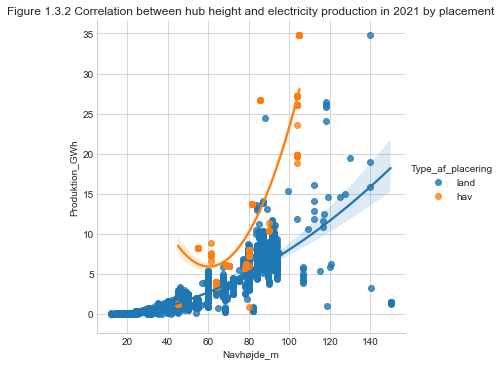

In [36]:
plt.figure(figsize=(16,8), dpi=50)
sns.lmplot(x='Navhøjde_m', y='Produktion_GWh', data=df2021, hue='Type_af_placering', order=2).set(title='Figure 1.3.2 Correlation between hub height and electricity production in 2021 by placement')

Firstly we observe from figure 3.2 that it looks like there's a lot more windmills placed on land rather than in the sea, which alligns with the true amount of windmills on land than on the sea according to Winddendanmark.dk. But most of the windmills which are observed in the figure on the sea have the same size/capacity and are located next to eachother and therefore produce the same output, hence the observations lies on top of eachother.

Windmills of the same size produces more electricity placed in the sea than windmills placed on land. This might be due to the intensity of the wind which is higher at sea than in the countryside.

**Subquestion 3**

In [37]:
# Creating dataframe for sea in the years 1990 - 2021
df3_sea = df1[df1['Year'] > '1989' ]
df3_sea = df3_sea[df3_sea['Type_af_placering'] == 'hav']
# Changing the type of year element to integer
df3_sea['Year'] = df3_sea['Year'].astype(int)
# Creating dataframe for mean values for sea on capacity and production in GWh
df4_sea = df3_sea.groupby(['Year'])[['Kapacitet_GW_yearly', 'Produktion_GWh']].mean().round(4)
# Measuring the difference between annual average capacity and production on sea and land and inserting to datafram
df4_sea = df4_sea.assign(Diff_sea_yearly = lambda x: x.Kapacitet_GW_yearly - x.Produktion_GWh)
df4_sea.head()

,Kapacitet_GW_yearly,Produktion_GWh,Diff_sea_yearly
Year,,,
1991,3.942,0.362,3.580
1992,3.942,0.973,2.969
1993,3.942,1.071,2.871
1994,3.942,0.996,2.946
1995,3.942,1.004,2.938


In dataframe: df4_sea, we notice that there isn't any observations for 1990. This is because the first windmill placed at sea was in 1991.

In [38]:
# Creating datafram for land in the years 1990 - 2021
df3_land = df1[df1['Year'] > '1989' ]
df3_land = df3_land[df3_land['Type_af_placering'] == 'land']
# Changing the type of year element to integer
df3_land['Year'] = df3_land['Year'].astype(int)
# Creating dataframe for sea in the years 1990 - 2021
df4_land = df3_land.groupby(['Year'])[['Kapacitet_GW_yearly', 'Produktion_GWh']].mean().round(4)
# Measuring the difference between annual average capacity and production on sea and land and inserting to datafram
df4_land = df4_land.assign(Diff_land_yearly = lambda x: x.Kapacitet_GW_yearly - x.Produktion_GWh)
df4_land.head()

,Kapacitet_GW_yearly,Produktion_GWh,Diff_land_yearly
Year,,,
1990,1.0740,0.2260,0.8480
1991,1.1559,0.2397,0.9162
1992,1.1992,0.2691,0.9301
1993,1.2394,0.2858,0.9536
1994,1.3226,0.3139,1.0087


In [39]:
# Resetting index for both dataframes
df4_sea.reset_index(inplace=True)
df4_land.reset_index(inplace=True)
df4_land.head()

,Year,Kapacitet_GW_yearly,Produktion_GWh,Diff_land_yearly
0,1990,1.0740,0.2260,0.8480
1,1991,1.1559,0.2397,0.9162
2,1992,1.1992,0.2691,0.9301
3,1993,1.2394,0.2858,0.9536
4,1994,1.3226,0.3139,1.0087


In [40]:
# Defining variables
q33_sea_plot = df4_sea.groupby(['Year'])['Diff_sea_yearly'].mean()
q33_land_plot = df4_land.groupby(['Year'])['Diff_land_yearly'].mean()

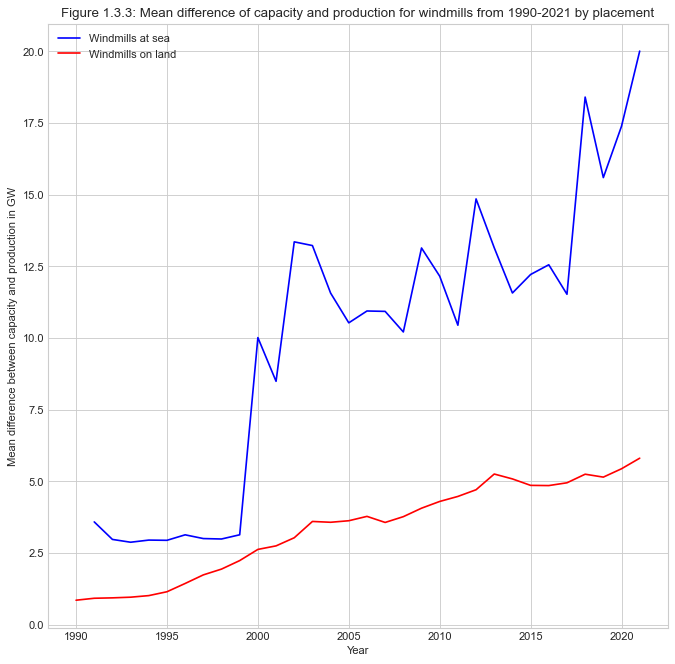

In [41]:
# Plotting the figure
fig = plt.figure(figsize=(10,10), dpi=80)

ax = fig.add_subplot(1,1,1)
ax.set_title('Figure 1.3.3: Mean difference of capacity and production for windmills from 1990-2021 by placement')
ax.plot(q33_sea_plot, color='blue', label='Windmills at sea')
ax.plot(q33_land_plot, color='red', label='Windmills on land')


ax.set_xlabel('Year')
ax.set_ylabel('Mean difference between capacity and production in GW')

ax.legend(loc='best',frameon=False);

plt.show()

We see from figure 3.3 above, that the mean difference between windmills at sea and land are increasing. The difference for windmills on the sea are greater in level and growth, this might be due to the greater overall capacity of the windmills at sea. The level-shift for windmills in the sea in 1999 might be due to a great installation of sea-placed windmills.
The windmills on land are almost linearly increasing in the difference between capacity and production.

# A discrete-continuous consumption-saving model

## Question 1:

**Subquestion 1:**

In [42]:
# Defining the parameters given in the assignment.
rho = 8.0
nu = 0.1
kappa = 1  
beta = 0.90
r = 0.04
p = 0.5
Delta = 0.4
tau = 0.8
gamma = 1.2
ybar = 1.5
#s = 0

m_min = tau+1e-5
m_max = 5

In [43]:
#Creating par.parameters
par = SimpleNamespace()
par.rho = rho
par.nu = nu
par.kappa = kappa
par.beta = beta
par.tau = tau
par.gamma = gamma
par.ybar = ybar
par.r = r
par.p = p
par.Delta = Delta
par.m_min = m_min
par.m_max = m_max

In order to solve the function, we need to define the utility function. The utility is combined of a general utility function based on consumption: utility, a bequest: bequest and the utility in periodes 1 and 2.

In [44]:
#Utility by consumption
def utility(par, c):
    return c**(1-par.rho)/(1-par.rho)

#Utility from bequest
def bequest(par, m, c):
    return par.nu*(m-c+par.kappa)**(1-par.rho)/(1-par.rho)

#Utility in period 2
def v2(par, c2, m2):
    return utility(par, c2) + bequest(par, m2, c2)

#Utility in period 1
def v1(par, c1, m1, v2_interp, s):
    
    # a. v2 if low income realization
    m2_low = (1+par.r)*(m1-c1-par.tau*s) + par.ybar + par.gamma * s - par.Delta
    v2_low = v2_interp([m2_low])[0]

    #v2 if high income realization
    m2_high = (1+par.r)*(m1-c1-par.tau*s) + par.ybar + par.gamma * s + par.Delta
    v2_high = v2_interp([m2_high])[0]

    # c. Expected v2 value
    E_v2 = (1-par.p)*v2_low + par.p*v2_high

    # d. Total value, a combination of the general utility function and the expected utility in period 2.
    return utility(par, c1) + par.beta*E_v2

In order to solve the model, we need to define an optimizer which optimizes utility in regard to saving and consumption in both periodes. The solution is presented below.

In [45]:
def solve_period_2(par):

    #We create a linspace for m2, and two empty array in which we will plot the corresponding v2 and c2 values.
    m2_grid = np.linspace(1e-4,5,100)
    v2_grid = np.empty(100)
    c2_grid = np.empty(100)

    #Solve consumption problem for each m2 furthermore we create c0 as a placeholder for c2.
    for i,m2 in enumerate(m2_grid):

        # i. The function of the constraint.
        obj = lambda c: -v2(par, c[0], m2)

        # ii. Initial guess, this is a arbitrary guess.
        c0 = m2/2

        # iii. Optimize the objective of allocating between consumption and saving.
        result = optimize.minimize(obj, [c0], method='L-BFGS-B', bounds=((1e-8, m2),))

        # iv. Save solution in the two empty arrays defined above.
        v2_grid[i] = -result.fun
        c2_grid[i] = result.x

    return m2_grid, v2_grid, c2_grid


def solve_period_1(par, v2_interp, v1):
    
    # Same course of action as in the solver for period 2. However this time we include an empty array of s, which needs to obtain the same amount of observations as m1.
    m1_grid = np.linspace(1e-8, 5, 100)
    v1_grid = np.empty(m1_grid.size)
    c1_grid = np.empty(m1_grid.size)
    s_grid = np.empty(m1_grid.size)

    # Solve consumption problem for each m1 furthermore we create c0 as a placeholder for c1.
    for i, m1 in enumerate(m1_grid):
        
        # Optimal consumption in period 1
        
        c0 = m1/2 # The initial guess is the same for both cases
        
    ## The case with studying
            # i. Objective function
        def obj_study(c): return -v1(par, c[0], m1, v2_interp, s=1)
    
            # ii. Optimize the objective given debt constraint
        opt_c_study = optimize.minimize(obj_study, [c0], method='L-BFGS-B', bounds=((1e-12, m1),))
        ######## ret evt
    ## The case with out studying
            # i. Objective function
        def obj_no_study(c): return -v1(par, c[0], m1, v2_interp, s=0)
    
            # ii. Optimize the objective given debt constraint
        opt_c_no_study = optimize.minimize(obj_no_study, [c0], method='L-BFGS-B', bounds=((1e-12, m1),))

        if -opt_c_study.fun > -opt_c_no_study.fun:
            s_grid[i] = 1
            c1_grid[i] = opt_c_study.x
            v1_grid[i] = -opt_c_study.fun
            
        else:
            s_grid[i] = 0
            c1_grid[i] = opt_c_no_study.x
            v1_grid[i] = -opt_c_no_study.fun
    
    return m1_grid, v1_grid, c1_grid, s_grid

We now have defined the solution functions of period 1 and 2 which we need to solve the general utility function.

In [46]:
def solve(par,v1):
    
    # a. solve period 2
    m2_grid, v2_grid, c2_grid = solve_period_2(par)
    
    # b. construct interpolator
    v2_interp = interpolate.RegularGridInterpolator((m2_grid,), v2_grid,
                                                    bounds_error=False,fill_value=None)
    
    # b. solve period 1
    m1_grid, v1_grid, c1_grid, s_grid = solve_period_1(par, v2_interp, v1)
    
    return m2_grid, v2_grid, c2_grid, m1_grid, v1_grid, c1_grid, s_grid

m2_grid, v2_grid, c2_grid, m1_grid, v1_grid, c1_grid, s_grid = solve(par, v1)

The functions above solve the model with the parameters given in the assignemnt.

**Subquestion 2**

Now we plot the assigned $v_t$ values for the according level of $c_t$ and $m_t$

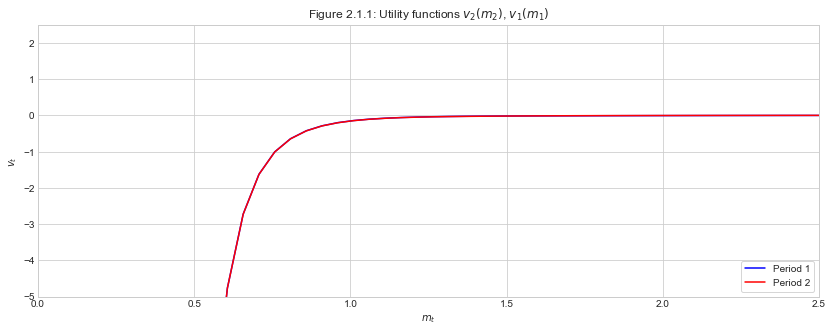

In [47]:
fig = plt.figure(figsize=(14,5))    
ax = fig.add_subplot(1,1,1)
ax.plot(m1_grid, v1_grid, label=f'Period 1', color='blue')
ax.plot(m2_grid, v2_grid, label=f'Period 2', color='red')
ax.legend(loc='lower right',facecolor='white',frameon=True)
ax.set_xlabel('$m_t$')
ax.set_ylabel('$v_t$')
ax.set_title(f'Figure 2.1.1: Utility functions $v_2(m_2)$, $v_1(m_1)$');
ax.set_xlim([0,2.5])
ax.set_ylim([-5, 2.5]);

Consumption in boths periods are identical. This is due to both types of agents having the same preferences which is solely decided by parameter values. Since the function has static imput the graphs will be identical. It also seems like the agents always will decide to study which could be due to the high $\gamma$ value.

**Subquestion 3:**

We plot the consumption in both periodes in the same graph to be able to compare if the agent would decide to spend more in either period given different levels of cash in hand.

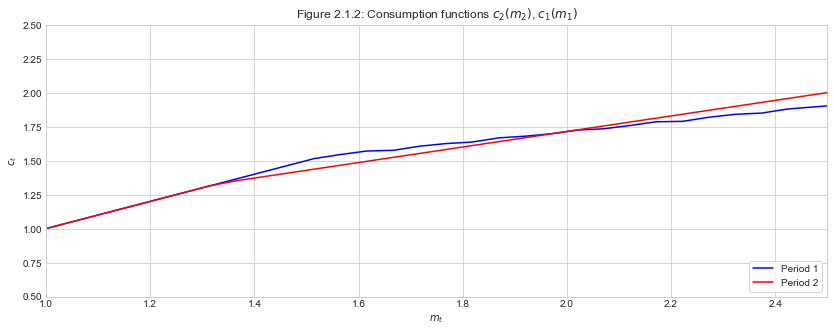

In [48]:
fig = plt.figure(figsize=(14,5))    
ax = fig.add_subplot(1,1,1)
ax.plot(m1_grid, c1_grid, label=f'Period 1', color='blue')
ax.plot(m2_grid, c2_grid, label=f'Period 2', color='red')
ax.legend(loc='lower right',facecolor='white',frameon=True)
ax.set_xlabel('$m_t$')
ax.set_ylabel('$c_t$')
ax.set_title(f'Figure 2.1.2: Consumption functions $c_2(m_2)$, $c_1(m_1)$');
ax.set_xlim([1, 2.5])
ax.set_ylim([0.5, 2.5]);

Consumption differs in the two periodes. This is due to schooling having a positive effect on income in period 2, however it limits the consumption in period 1. People who decided to study has a higher consumption in period 1 due to having a higher income in periode 2. This is due to the agents preferences of evening out consumption between periodes.

**Subquestion 4:**

Due to s being a discrete and binary variable the function could only ever take value of either 0 or 1. This would result in a graph that in one point and one point only would shift from $s(c1,m1,a1,par) = 0$ to $s(c1,m1,a1,par)=1$. Where this point is, would be defined by the parameter values given earlier. If a agent is highly risk avers such that they prefer a higher share of consumption in period 1 they would need a higher level of $m_1$ to shift into schooling, as the schooling cost would decrease consumption in period 1. This is of course vice versa for an agent which is risk loving. 

## Question 2:

This question is unanswered.

# Q3 Approximating a function

## Question 1 

In [49]:
def Ti(x,i):
    """ 
    args:
    x (float): point in which we vealuate the function
    i (immutable ndarray): Index of our i vector
    return:
    Ti (ndarray): output float
    """
    return np.cos(i * np.arccos(x))

def f_approx(x, f, N, M):
    """ 
    args:
    x (float): point in which we vealuate the function
    f (function): function we want to approximate
    M (integer): Last value in k list
    N (integer): Last value in i list
    return:
    Ti (ndarray): output float
    """
    if  abs(x) > 1:
        return (f'x={x} not valid')
    
    else:
    #a. Defining empty lists for later inputs
        z_k_vec = []
        y_k_vec = []
        a_i_vec = []

    #b. defining ranges 
        ks = np.arange(1, M+1)
        Is = np.arange(N+1)

    #c. calculating inputs in the algorithm
        #i. z_k
        for k in ks:
            z=-np.cos((2*k-1)/(2*M)*np.pi)
            z_k_vec.append(z)

        #ii. y_k - appending z_k in f(x) (f(x) is not yet defined)              
        for z in z_k_vec:
            y_k_vec.append(f(z))
            
        #iii. a_i - calculting a_i given the saved vales in z_k_vec and y_k_vec
        for i in Is:
            a = np.sum([y_k_vec[k-1] * Ti(z_k_vec[k-1],i) for k in ks])/np.sum([Ti(z_k_vec[k-1],i)**2 for k in ks])
            a_i_vec.append(a)



        #checking if input x is in [-1,1]. If not printing, 'input not valid'
        return np.round(np.sum([a_i_vec[i]*Ti(x,i) for i in Is]),4)

## Question 2

In [50]:
# a. defining input values for the f_approx function
f = lambda x: 1/(1+x**2) + x**3 - 0.5*x
N = 5 
M = 8 
xs = np.array([-0.5, 0.0, 0.98])

# b. creating lists for output values
f_vec =[]
f_approx_vec =[]
f_diff_vec =[]

# c. calculating and appending outout values to the lists
for x in xs:
    f_vec.append(np.round(f(x),4))


for x in xs:
    f_approx_vec.append(f_approx(x,f,N,M))
    

for x in xs:
    f_diff_vec.append(np.round(f(x)-f_approx(x,f,N,M),4))

# d. printing output
for i in range(len(xs)):
    print(f' for x={xs[i]}, f_diff = f_true - f_approx = {f_vec[i]} - {f_approx_vec[i]}  = {f_diff_vec[i]}\n')

 for x=-0.5, f_diff = f_true - f_approx = 0.925 - 0.9326  = -0.0076

 for x=0.0, f_diff = f_true - f_approx = 1.0 - 0.9913  = 0.0087

 for x=0.98, f_diff = f_true - f_approx = 0.9613 - 0.9638  = -0.0025



The above code apprioimate the f function with our algorithm, f_approx. Values x in xs satisfies x $\in$ [-1,1] why the algorithm proceed. In case x $\not\in$[-1,1] the algorithm print 'x input not valid'. This is shown below.

In [51]:
x_false= np.array([-0.5, 0.0, -5])
x_false_vec = []
for x in x_false:
    x_false_vec.append(f_approx(x,f,N,M))
    
print(x_false_vec)

[0.9326, 0.9913, 'x=-5.0 not valid']
